In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels =  train_features.shape
print("number of training examples = {}, image rows = {}, image columns = {} and image channels = {}".format(num_train, img_rows, img_cols, img_channels))
num_test, _, _, _ =  test_features.shape
print("number of test examples = {}".format(num_test))
num_classes = len(np.unique(train_labels))
print("total number of unique classes are {} = ".format(num_classes))

170500096/170498071 [==============================] - 4s 0us/step
number of training examples = 50000, image rows = 32, image columns = 32 and image channels = 3
number of test examples = 10000
total number of unique classes are 10 = 


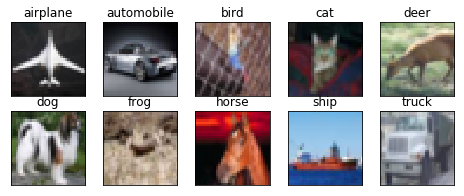

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Now changing the architecture of the model according to the given instructions


1.   remove dense layer
2.   add layers required to reach receptive field
3.   fix kernel scaleup and down (1x1)
4.   see if all dropouts are properly placed
5.   follow the guidelines we discussed in the class
6.   get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same
7.   save file as assignment_6A



In [0]:
# Defining the model again based on the given instructions
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005), input_shape=(32, 32, 3))) # 32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 16



model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 8


model.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, border_mode='same', kernel_regularizer=l2(0.0005))) # 8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Convolution2D(256, 3, 3, kernel_regularizer=l2(0.0005))) # 6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, 3, 3, kernel_regularizer=l2(0.0005))) # 4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Convolution2D(128, 1, 1, kernel_regularizer=l2(0.0005))) # 4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 1, 1, kernel_regularizer=l2(0.0005))) # 4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Convolution2D(32, 1, 1, kernel_regularizer=l2(0.0005))) # 4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(10, 4, 4, kernel_regularizer=l2(0.0005))) # 1
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 40s 102ms/step - loss: 2.3826 - acc: 0.3248 - val_loss: 2.4705 - val_acc: 0.3292
Epoch 2/100
390/390 [==============================] - 36s 92ms/step - loss: 1.6788 - acc: 0.5608 - val_loss: 2.1321 - val_acc: 0.4253
Epoch 3/100
390/390 [==============================] - 36s 92ms/step - loss: 1.3548 - acc: 0.6562 - val_loss: 1.5227 - val_acc: 0.6002
Epoch 4/100
390/390 [==============================] - 36s 92ms/step - loss: 1.1639 - acc: 0.7097 - val_loss: 1.6874 - val_acc: 0.5302
Epoch 5/100
390/390 [==============================] - 36s 92ms/step - loss: 1.0659 - acc: 0.7378 - val_loss: 1.7030 - val_acc: 0.5883
Epoch 6/100
390/390 [==============================] - 36s 92ms/step - loss: 1.0004 - acc: 0.7566 - val_loss: 1.1478 - val_acc: 0.7134
Epoch 7/100
390/390 [==============================] - 36s 92ms/step - loss: 0.9560 - acc: 0.7685 - val_loss: 1.4269 - val_acc: 0.6297
Epoch 8/100
390/390 [==============================] -

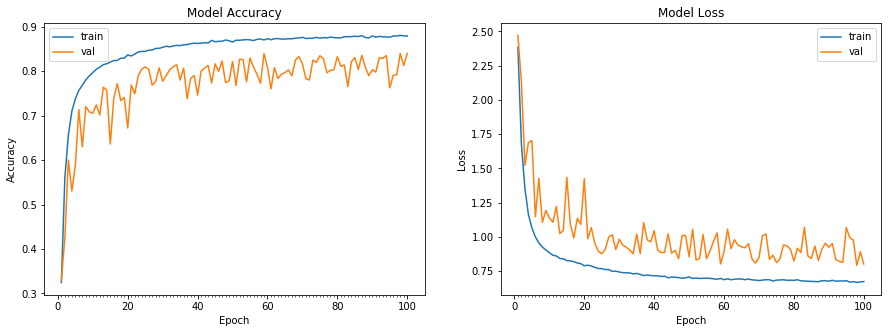

Accuracy on test data is: 84.00


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))